### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [829]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [830]:
# Question 1: Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. How many records are there?

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

df = pd.read_csv('tw_tweets_users_media_places.csv', index_col='tweet_id')

print(len(df))





534


In [831]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.
df_copy = df.select_dtypes(include='number')
print(df_copy.columns)
print(df_copy.head())

print(df_copy.shape)



Index(['context_annotations_count', 'count_annotations', 'count_cashtags',
       'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes',
       'referenced_tweet_count', 'replies', 'retweets', 'followers_count',
       'following_count', 'tweet_count', 'listed_count', 'height', 'width'],
      dtype='object')
                     context_annotations_count  count_annotations  \
tweet_id                                                            
1440484799970304000                          1                0.0   
1439618825171963904                          2                2.0   
1248872872837332992                          3                0.0   
1250729294051053568                          1                2.0   
1249612131433095168                          1                2.0   

                     count_cashtags  count_hashtags  count_mentions  \
tweet_id                                                              
1440484799970304000             0.0             0

In [832]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.

# Selecting the label
y = df_copy['retweets']

# Selecting the features, excluding 'likes', 'quotes', 'replies', and 'retweets'
X = df_copy.drop(columns=['retweets', 'likes', 'quotes', 'replies']).assign(const=1)
results = sm.OLS(y, X).fit()

# Print out the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.81e-05
Time:                        22:28:37   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [833]:
# Question 4: Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.

df = df.assign(model_1=results.predict(X))
df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [834]:
# Question 5: Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column. 


print(f'R-squared: {results.rsquared}')
print(f'Adjusted R-squared: {results.rsquared_adj}')
print(f'RMSE: {mean_squared_error(y, df.model_1, squared=False)}')
print(f'MAE: {mean_absolute_error(y, results.predict(X))}')
print('Mean of Label Column (retweets): ' + str(df['retweets'].mean()))





R-squared: 0.07614441144416206
Adjusted R-squared: 0.0548655879073674
RMSE: 18.934566285584516
MAE: 5.159386575412486
Mean of Label Column (retweets): 3.900749063670412


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [835]:
# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new 
# columns. Replace the existing dates with those values. 

# HINT: First, cast those columns to dt.date data types. Second, there are
# many ways to calculate the number of days until January 1, 2022. But I 
# used the strptime() method of the datetime package to cast "2022-1-1" 
# into a date, subtract the column value from that date, and then return 
# the result in days (.dt.days). 

# Print the first five records of this new dataset.
from datetime import datetime

untilDate = datetime.strptime("2022-01-01", "%Y-%m-%d")

df['created_at_tweet'] = (untilDate - pd.to_datetime(df['created_at_tweet']).dt.tz_localize(None)).dt.days
df['created_at_author'] = (untilDate - pd.to_datetime(df['created_at_author']).dt.tz_localize(None)).dt.days
df.head()





,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,100,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,103,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,629,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,624,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,627,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [836]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. 

# Print out the results summary.

# HINT: Do not forget that if you are using the same DataFrame that contained
# the 'model_1' predicted values column, you will need to drop that column as 
# well. Otherwise, you are creating a new model to predict retweet count using
# a predicted value of retweet count from a prior model run which doesn't make
# any sense. However, you may have created a copy of the DataFrame in some 
# prior task so that 'model_1' is not even in the DataFrame you are using now. 
# In that case, this HINT is irrelevant.

df_copy2 = df.select_dtypes(include='number')
y = df_copy2['retweets']
X = df_copy2.drop(columns=['retweets', 'likes', 'quotes', 'replies']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           6.40e-05
Time:                        22:28:37   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [837]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 

print(f'R-squared: {results.rsquared}')
print(f'Adjusted R-squared: {results.rsquared_adj}')
print(f'RMSE: {mean_squared_error(y, df.model_1, squared=False)}')
print(f'MAE: {mean_absolute_error(y, results.predict(X))}')
print('Mean of Label Column (retweets): ' + str(df['retweets'].mean()))

R-squared: 0.08003388236213449
Adjusted R-squared: 0.055217840653213224
RMSE: 18.934566285584516
MAE: 5.256920240722111
Mean of Label Column (retweets): 3.900749063670412


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [838]:
# Question 9: We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. As in #7, make sure you are not including the 'model_1' 
# column of predicted values. Do not train the model again yet. You are 
# just creating the dummy codes in this step.

dummies = pd.get_dummies(df, columns=['lang', 'reply_settings', 'source', 'protected', 'verified', 'terms'], drop_first=True)
dummies = dummies.select_dtypes(['number'])
dummies = dummies.drop(['retweets', 'likes', 'quotes', 'replies', 'model_1'], axis=1).assign(const=1)
dummies.head()





,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,const
tweet_id,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,100,0,3352,2709,4999,96,15,405,813,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,103,0,2873,140,735,99,0,2048,1536,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,629,0,3651,7510,7260,100,103,288,278,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,624,0,3651,7510,7260,100,103,2048,2048,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,627,0,3651,7510,7260,100,103,2048,2048,1


In [839]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.


y = df['retweets']
X = dummies

results = sm.OLS(y, X).fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           6.40e-05
Time:                        22:28:37   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [840]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.

def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression

  df_output = pd.DataFrame(columns=['VIF'])

  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    r_squared = LinearRegression().fit(X, y).score(X, y)
    vif = 1 / (1 - r_squared)

    df_output.loc[col] = vif

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)




/var/folders/7l/7tgw_8gd5dg1rrh9_ybll2ym0000gn/T/ipykernel_3499/3943590160.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1 / (1 - r_squared)


,VIF
count_mentions,inf
listed_count,19.792604
followers_count,18.496446
height,2.038993
width,2.015382
count_hashtags,1.922018
context_annotations_count,1.726309
created_at_author,1.423203
following_count,1.293615
tweet_count,1.073500


In [841]:
# Question 12: We need to eliminate those features with excessive multi-collinearity. 
# However, this may happen naturally as we remove those features with large p-values. 
# Therefore, start by removing the feature with the highest p-value and then rerun 
# the prior model. One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared and R-squared
# adjusted is <= 0.01 (rounded). 

# Why would we do this? Because when R-squared adjusted is significantly lower than 
# R-squared, we have too many variables in the model that are not significantly 
# contributing to model fit. Once more, remove the highest p-value feature one-at-a-time
# until R-squared minus R-squared adjusted is <= 0.01 (rounded). You do NOT need to keep
# the results summary of every model. You can overwrite the prior model summary each time
# until you meet the criterion.



y = df['retweets']
X = dummies.drop(columns=['context_annotations_count','count_cashtags','listed_count', 'created_at_author','following_count', 'tweet_count','count_hashtags'])

results = sm.OLS(y, X).fit()
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     5.973
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.04e-06
Time:                        22:28:37   Log-Likelihood:                -2328.9
No. Observations:                 534   AIC:                             4674.
Df Residuals:                     526   BIC:                             4708.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
count_annotations         -0

In [842]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.

vif(X)




/var/folders/7l/7tgw_8gd5dg1rrh9_ybll2ym0000gn/T/ipykernel_3499/3943590160.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1 / (1 - r_squared)


,VIF
count_mentions,inf
width,1.998752
height,1.996032
count_urls,1.041233
created_at_tweet,1.030085
referenced_tweet_count,1.025066
followers_count,1.018946
count_annotations,1.013932


In [843]:
# Question 14: Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.

from sklearn import preprocessing
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)

df_minmax.head()



,count_annotations,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,followers_count,height,width,const
0,0.0,0.0,0.0,0.000000,0.0,0.004192,0.147887,0.343468,0.0
1,0.5,0.0,0.0,0.005300,0.0,0.000217,0.919249,0.686936,0.0
2,0.0,0.0,0.0,0.934629,0.0,0.011620,0.092958,0.089311,0.0
3,0.5,0.0,0.5,0.925795,0.0,0.011620,0.919249,0.930166,0.0
4,0.5,0.0,0.5,0.931095,0.0,0.011620,0.919249,0.930166,0.0


In [844]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.


KeyError: 'retweets'

13.297247408656315


<Axes: xlabel='retweets', ylabel='Count'>

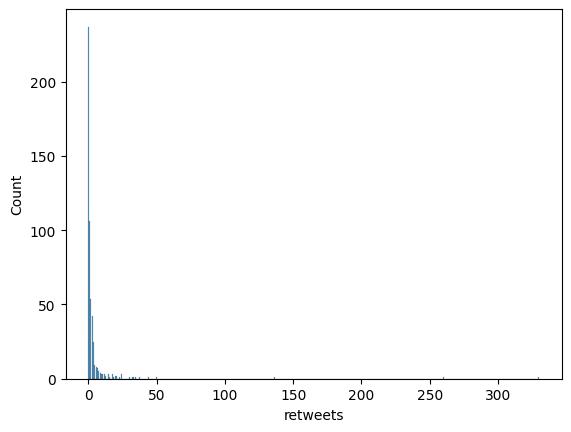

In [ ]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.

import seaborn as sns
print(df['retweets'].skew())
sns.histplot(df['retweets'])



1.572517196447617


<Axes: xlabel='retweets', ylabel='Count'>

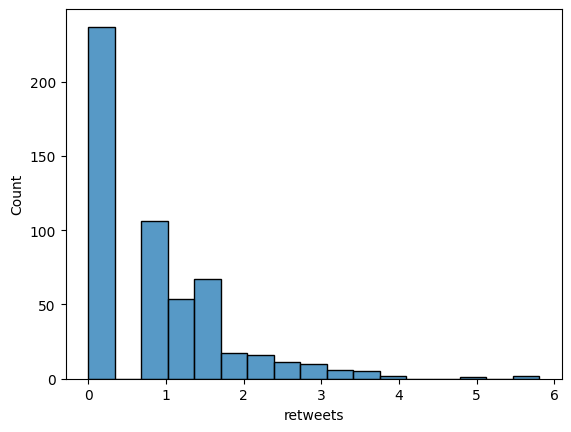

In [ ]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.

df['retweets'] = np.log1p(df['retweets'])
print(df['retweets'].skew())
sns.histplot(df['retweets'])


In [ ]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.


def mlr():
  y = df['retweets']
  X = dummies
  results = sm.OLS(y, X).fit()
  return results
results = mlr()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     7.555
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.52e-14
Time:                        22:27:50   Log-Likelihood:                -673.97
No. Observations:                 534   AIC:                             1378.
Df Residuals:                     519   BIC:                             1442.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co